<a href="https://colab.research.google.com/github/Gops03/TEORIA_DE_SE-ALES/blob/main/PSD_TEORIA_DE_SE%C3%91ALES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.signal import welch
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

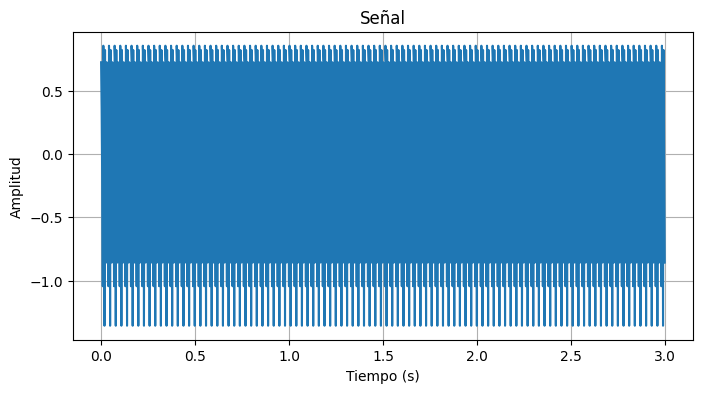

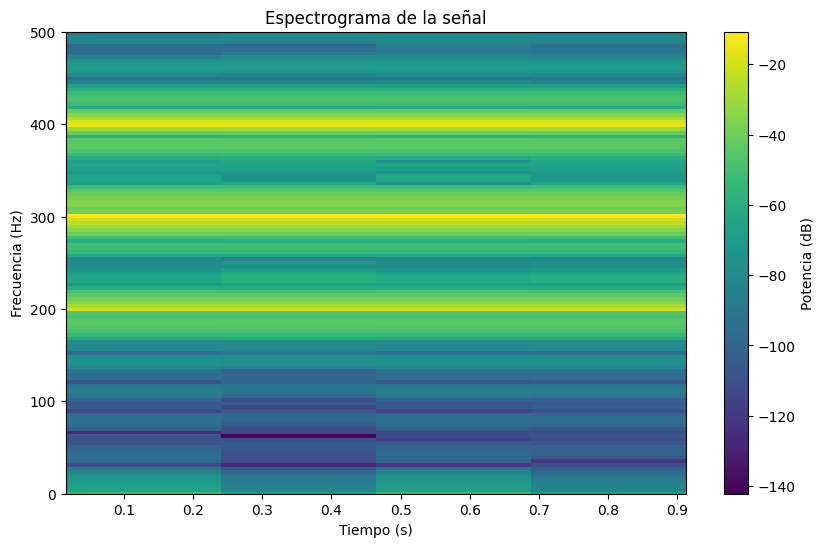

In [ ]:
  # Parámetros de la señal
fs = 1000  # Frecuencia de muestreo
t = np.linspace(0, 3, fs, endpoint=False)  # Vector de tiempo

# Parámetros de las ondas senoidales
f1, f2, f3 = 100, 200, 400
A1, A2, A3 = 0.9, 0.6, 0.3
phi1, phi2, phi3 = 0, np.pi/4, np.pi/2

# Crear la señal base x(t)
signal = (A1 * np.sin(2 * np.pi * f1 * t + phi1) +
          A2 * np.sin(2 * np.pi * f2 * t + phi2) +
          A3 * np.sin(2 * np.pi * f3 * t + phi3))

# Graficar la señal
plt.figure(figsize=(8, 4))
plt.plot(t, signal)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal')
plt.grid(True)
plt.show()

# Calcular el espectrograma
frequencies, times, Sxx = spectrogram(signal, fs)

# Graficar el espectrograma
plt.figure(figsize=(10, 6))
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='auto')
plt.colorbar(label='Potencia (dB)')
plt.title('Espectrograma de la señal')
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia (Hz)')
plt.ylim(0, 500)  # Ajusta el rango de frecuencias según tus datos
plt.show()

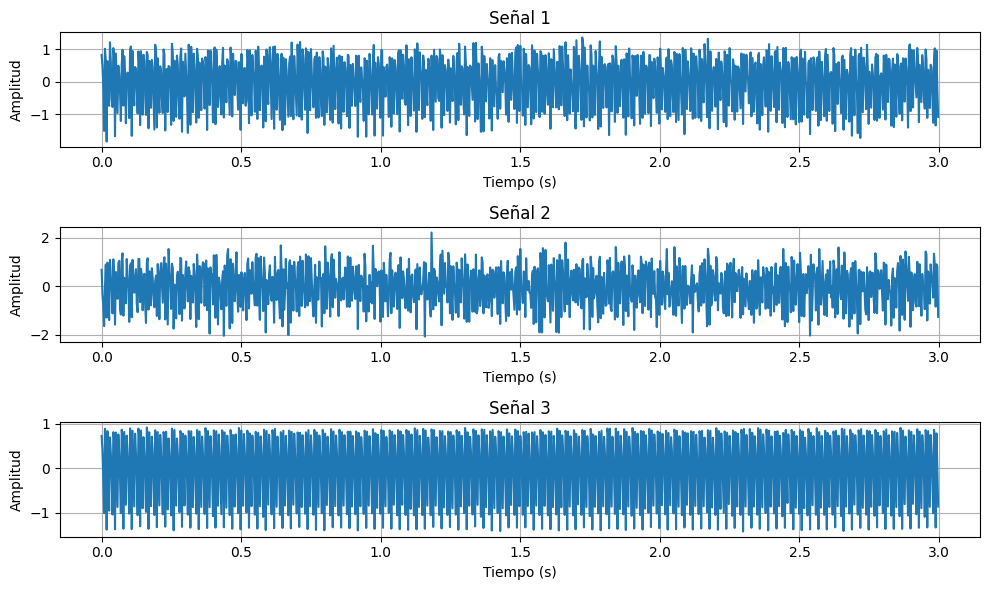

In [ ]:
# Generar un conjunto de datos sintéticos con diferentes niveles de ruido
num_samples = 1000
X = []
y = []

for _ in range(num_samples):
    # Añadir ruido blanco gaussiano con un nivel aleatorio
    noise_level = np.random.uniform(0.0001, 0.5)  # Diferente nivel de ruido para cada muestra
    noise = np.random.normal(0, noise_level, signal.shape)
    noisy_signal = signal + noise

    # Almacenar la señal ruidosa
    X.append(noisy_signal)

    # Calcular la PSD usando Welch
    f, Pxx = welch(noisy_signal, fs, nperseg=256)
    y.append(Pxx)

# Convertir las listas en arrays numpy
X = np.array(X)
y = np.array(y)

# Graficar tres señales aleatorias
plt.figure(figsize=(10, 6))
for i in range(3):
    plt.subplot(3, 1, i + 1)
    plt.plot(t, X[i])
    plt.title(f'Señal {i + 1}')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.grid(True)

plt.tight_layout()
plt.show()

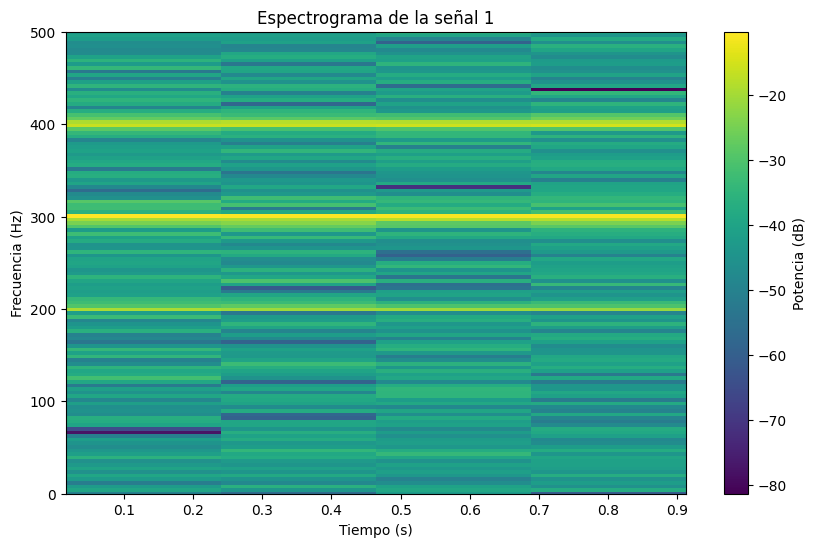

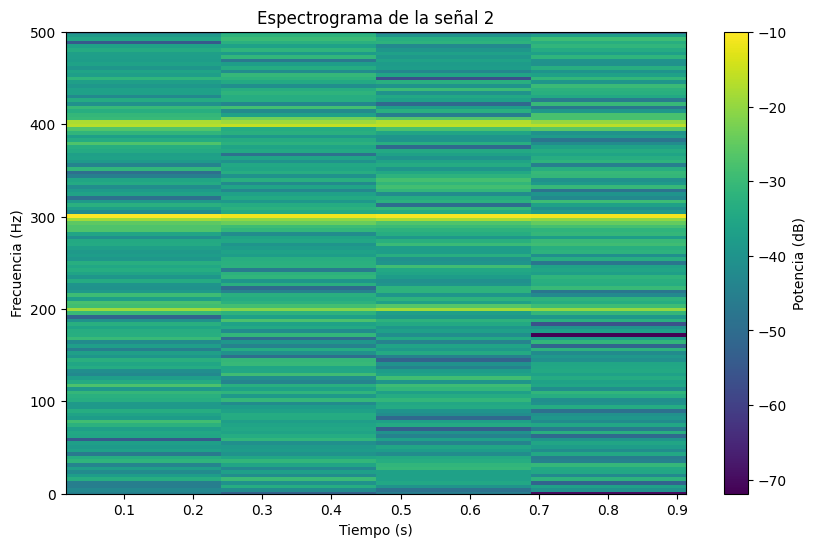

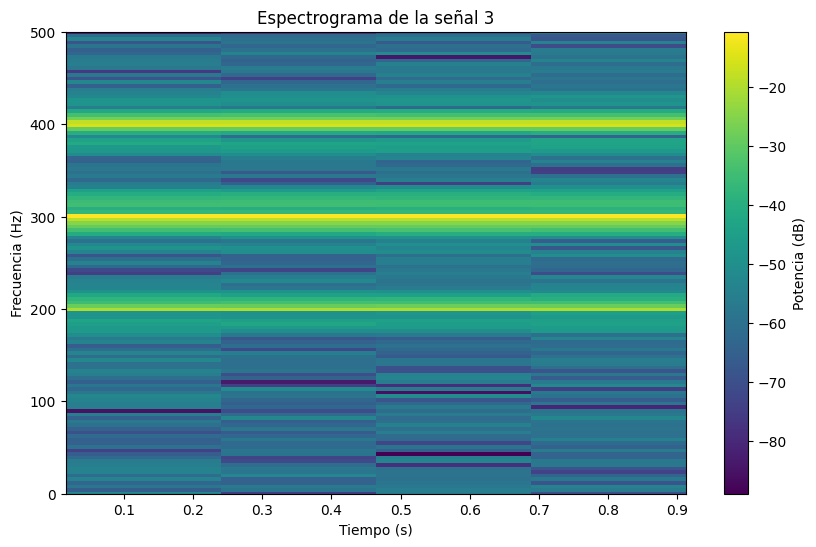

In [ ]:
# Calcular el espectrograma para cada señal
for i in range(3):
    frequencies, times, Sxx = spectrogram(X[i], fs)
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='auto')
    plt.colorbar(label='Potencia (dB)')
    plt.title(f'Espectrograma de la señal {i + 1}')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Frecuencia (Hz)')
    plt.ylim(0, 500)  # Ajusta el rango de frecuencias según tus datos
    plt.show()


In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo de la red neuronal
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1])  # Salida con la misma dimensión que la PSD
])

# Función para calcular el coeficiente de determinación R² como métrica personalizada
def r2_keras(y_true, y_pred):
    SS_res = K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res/(SS_tot + K.epsilon()))

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=[r2_keras])

# Entrenar el modelo
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=16, verbose=1)

Epoch 1/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0316 - r2_keras: -668.9818 - val_loss: 5.3264e-05 - val_r2_keras: -0.1297
Epoch 2/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.7568e-05 - r2_keras: 0.2059 - val_loss: 9.5439e-06 - val_r2_keras: 0.7974
Epoch 3/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.6977e-06 - r2_keras: 0.8583 - val_loss: 1.7281e-06 - val_r2_keras: 0.9633
Epoch 4/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2166e-06 - r2_keras: 0.9742 - val_loss: 4.0139e-07 - val_r2_keras: 0.9915
Epoch 5/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.9719e-07 - r2_keras: 0.9937 - val_loss: 1.7237e-07 - val_r2_keras: 0.9963
Epoch 6/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3483e-07 - r2_keras: 0.9971 - val_loss: 1.2968e-07 - val_r2_keras: 0.9972
Epoch 7/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.9188e-08 - r2_keras: 0.9979 - val_loss: 1.2182e-07 - val_r2_keras: 0.9974
Epoch 8/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - lo

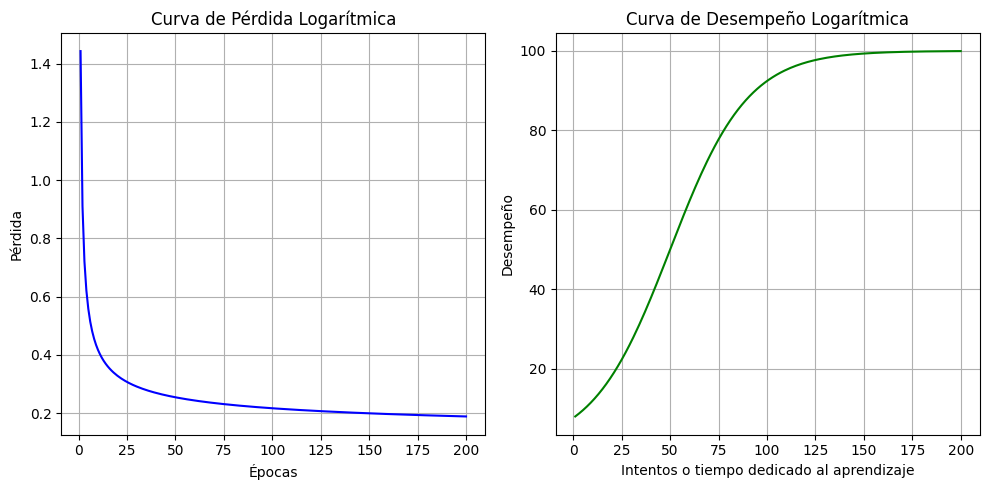

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos para la curva de pérdida logarítmica
epochs = np.linspace(1, 200, 200)
loss_logarithmic = 1 / np.log(epochs + 1)

# Generar datos para la curva de desempeño logarítmica
performance_logistic = 100 / (1 + np.exp(-0.05 * (epochs - 50)))

# Graficar la curva de pérdida logarítmica
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_logarithmic, color='blue')¿
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Curva de Pérdida Logarítmica')
plt.grid(True)

# Graficar la curva de desempeño logarítmica
plt.subplot(1, 2, 2)
plt.plot(epochs, performance_logistic, color='green')
plt.xlabel('Intentos o tiempo dedicado al aprendizaje')
plt.ylabel('Desempeño')
plt.title('Curva de Desempeño Logarítmica')
plt.grid(True)

plt.tight_layout()
plt.show()


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


<ipython-input-27-df6f5a6e9c37>:14: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,1)


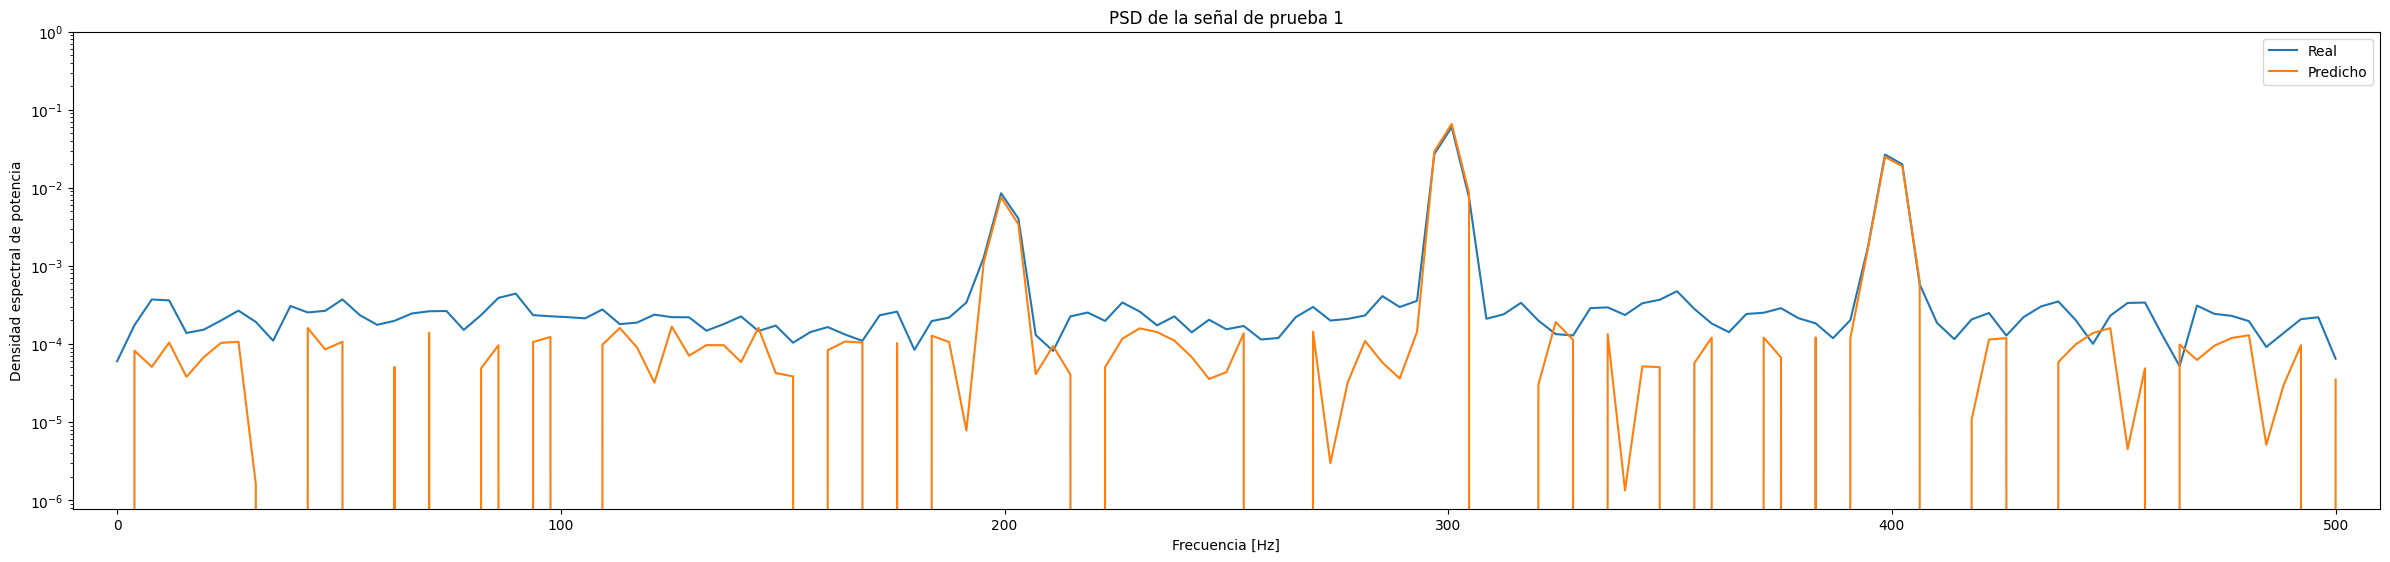

In [ ]:
# Predicciones
y_pred = model.predict(X_test)

# Visualizar algunas predicciones de la PSD
plt.figure(figsize=(24, 16))
for i in range(1):
    plt.subplot(3, 1, i+1)
    plt.semilogy(f, y_test[i], label='Real')
    plt.semilogy(f, y_pred[i], label='Predicho')
    plt.title(f'PSD de la señal de prueba {i+1}')
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Densidad espectral de potencia')
    plt.xlim(-10,510)
    plt.ylim(0,1)
    plt.legend()
    plt.tight_layout()

plt.show()


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


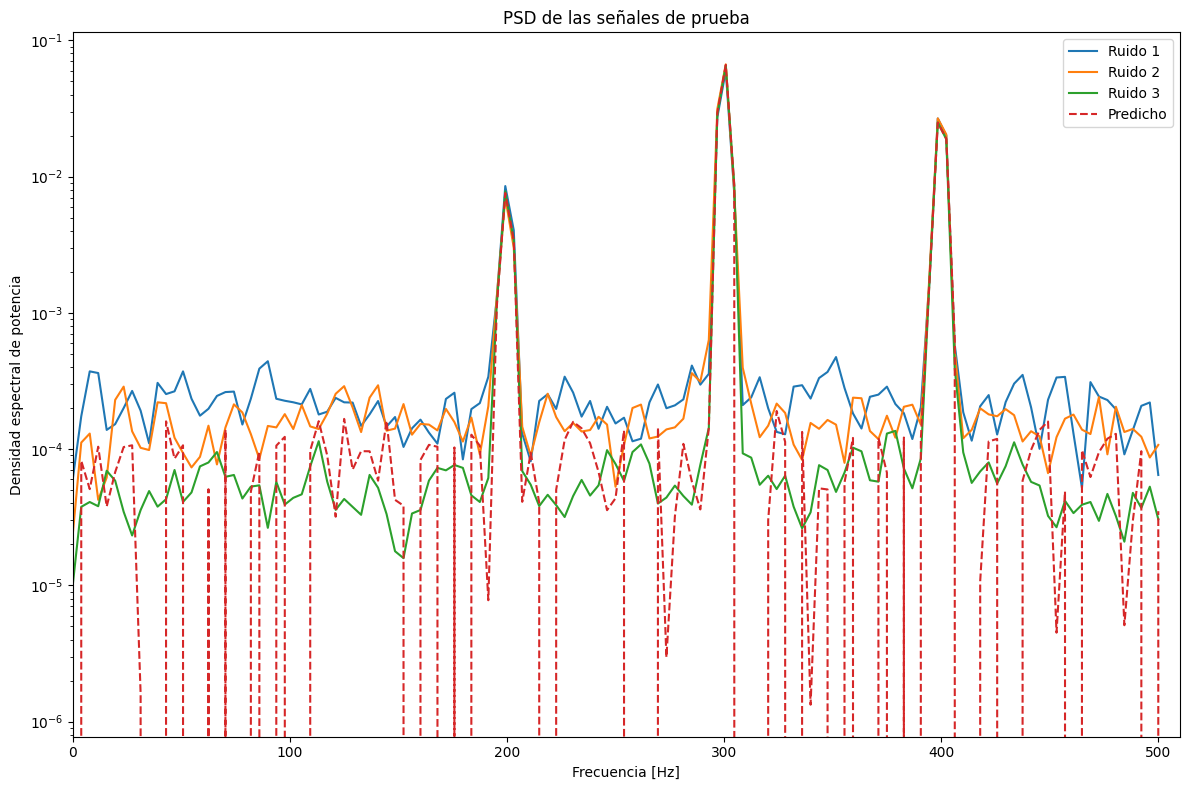

In [ ]:
# Predicciones
y_pred = model.predict(X_test)

# Visualizar las señales reales y una predicción de la PSD en un solo gráfico
plt.figure(figsize=(12, 8))

# Graficar las señales reales
for i in range(3):
    plt.semilogy(f, y_test[i], label=f'Ruido {i+1}')

# Graficar una sola predicción
plt.semilogy(f, y_pred[0], label='Predicho', linestyle='--')

plt.title('PSD de las señales de prueba')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral de potencia')
plt.legend()
plt.tight_layout()
plt.xlim(0,510)
plt.show()



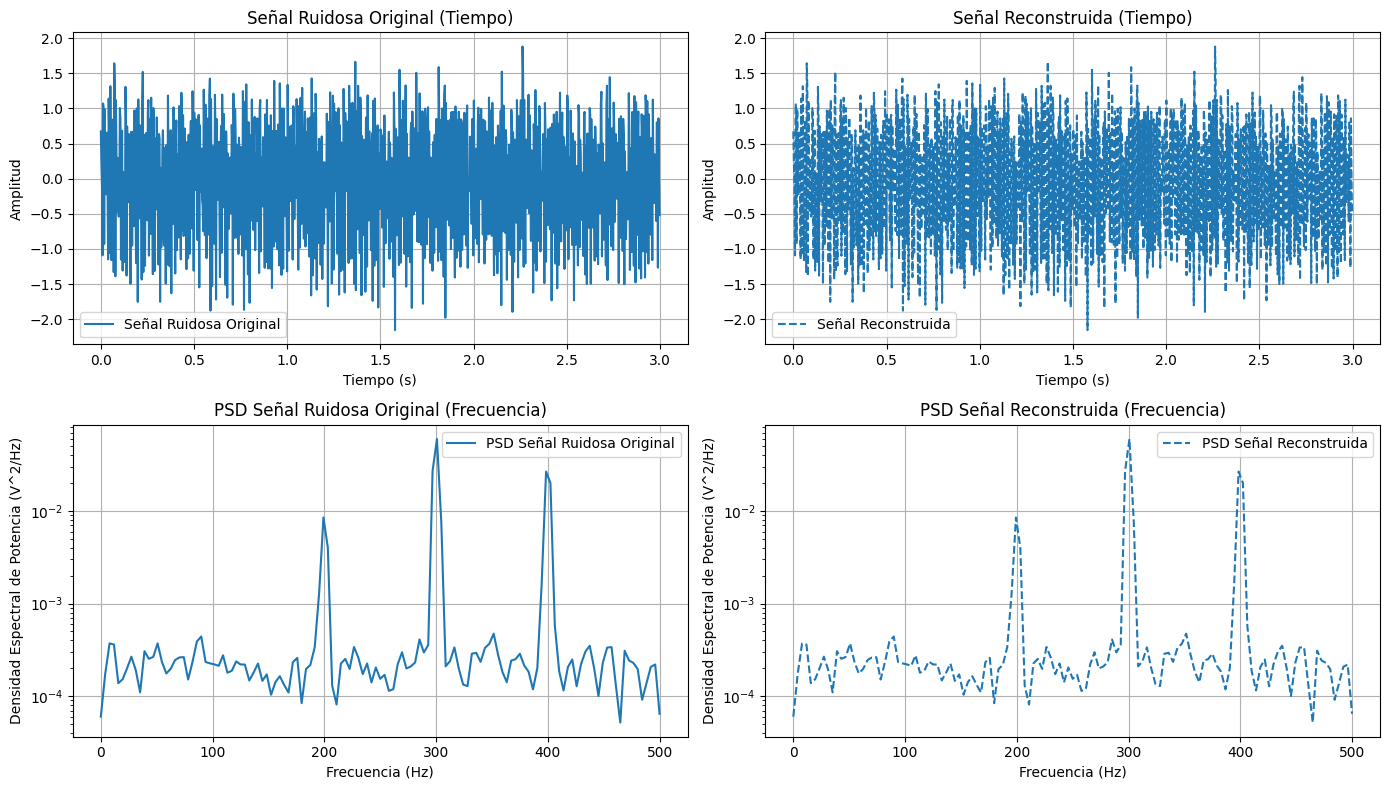

In [ ]:
import numpy as np
from scipy.signal import welch
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt

# Asumiendo que 'X_test' y 'y_test' están definidos, y 't' es el vector de tiempo.

# Generar el espectro de Fourier de la señal original
original_spectrum = fft(X_test[0])

# Reconstrucción directa de la señal desde el espectro de Fourier
def reconstruct_signal_from_spectrum(original_spectrum):
    # Obtener la señal a partir de la IFFT del espectro original
    reconstructed_signal = ifft(original_spectrum).real
    return reconstructed_signal

# Reconstruir la señal
reconstructed_signal = reconstruct_signal_from_spectrum(original_spectrum)

# Asegurarse de que la longitud de la señal reconstruida coincida con la señal original
reconstructed_signal = reconstructed_signal[:len(X_test[0])]

# Calcular la PSD de la señal reconstruida
f_reconstructed, Pxx_reconstructed = welch(reconstructed_signal, fs, nperseg=256)

# Calcular la PSD de la señal ruidosa original
f_original, Pxx_original = welch(X_test[0], fs, nperseg=256)

# Crear una figura con subplots
plt.figure(figsize=(14, 8))

# Graficar la señal original ruidosa y la señal reconstruida en el dominio del tiempo
plt.subplot(2, 2, 1)
plt.plot(t, X_test[0], label='Señal Ruidosa Original')
plt.title('Señal Ruidosa Original (Tiempo)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(t, reconstructed_signal, label='Señal Reconstruida', linestyle='--')
plt.title('Señal Reconstruida (Tiempo)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

# Graficar las PSDs de la señal ruidosa original y la señal reconstruida en el dominio de la frecuencia
plt.subplot(2, 2, 3)
plt.semilogy(f_original, Pxx_original, label='PSD Señal Ruidosa Original')
plt.title('PSD Señal Ruidosa Original (Frecuencia)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad Espectral de Potencia (V^2/Hz)')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.semilogy(f_reconstructed, Pxx_reconstructed, label='PSD Señal Reconstruida', linestyle='--')
plt.title('PSD Señal Reconstruida (Frecuencia)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad Espectral de Potencia (V^2/Hz)')
plt.legend()
plt.grid(True)

# Ajustar el layout para que no se solapen los subplots
plt.tight_layout()

# Mostrar la figura completa
plt.show()

Frecuencias fundamentales identificadas y sus potencias:
Frecuencia: 199.22 Hz, Potencia: 8.512e-03 V^2/Hz
Frecuencia: 300.78 Hz, Potencia: 5.991e-02 V^2/Hz
Frecuencia: 398.44 Hz, Potencia: 2.667e-02 V^2/Hz


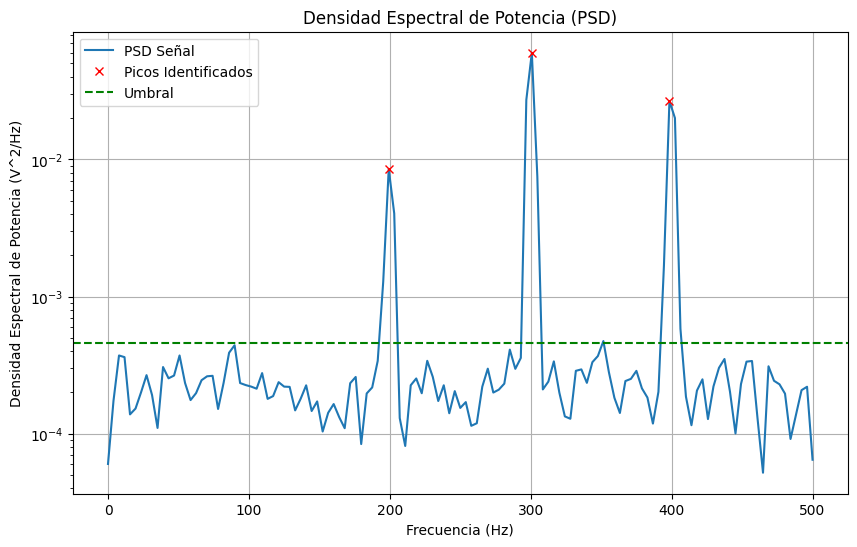

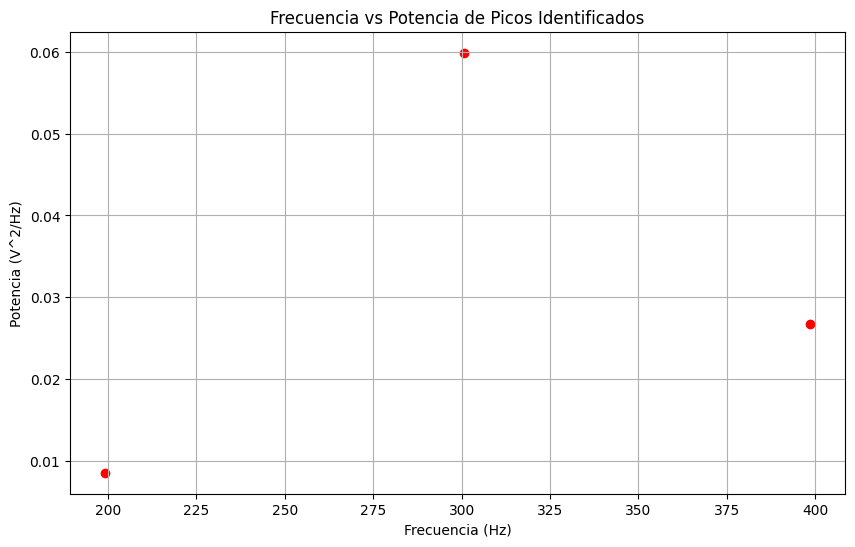

In [ ]:
import numpy as np
from scipy.signal import welch, find_peaks
import matplotlib.pyplot as plt

# Asumiendo que 'X_test[0]' es la señal que estamos analizando y 'fs' es la frecuencia de muestreo

# Calcular la PSD de la señal
f, Pxx = welch(X_test[0], fs, nperseg=256)

# Establecer un umbral basado en percentiles
q3 = np.percentile(Pxx, 75)
iqr = np.percentile(Pxx, 75) - np.percentile(Pxx, 25)
threshold = q3 + 1.5 * iqr

# Encontrar los picos más prominentes en la PSD
peaks, properties = find_peaks(Pxx, height=threshold, distance=20, prominence=0.005)

# Almacenar las frecuencias y potencias en un diccionario
frequencies_and_powers = {f[peak]: Pxx[peak] for peak in peaks}

# Mostrar las frecuencias identificadas junto con sus potencias, formateadas de manera más legible
print("Frecuencias fundamentales identificadas y sus potencias:")
for freq, power in frequencies_and_powers.items():
    print(f"Frecuencia: {freq:.2f} Hz, Potencia: {power:.3e} V^2/Hz")

# Graficar la PSD y marcar los picos identificados
plt.figure(figsize=(10, 6))
plt.semilogy(f, Pxx, label='PSD Señal')
plt.semilogy(list(frequencies_and_powers.keys()), list(frequencies_and_powers.values()), 'rx', label='Picos Identificados')
plt.axhline(y=threshold, color='g', linestyle='--', label='Umbral')
plt.title('Densidad Espectral de Potencia (PSD)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad Espectral de Potencia (V^2/Hz)')
plt.legend()
plt.grid(True)
plt.show()

# Graficar la relación entre Frecuencia y Potencia de cada pico
plt.figure(figsize=(10, 6))
plt.scatter(frequencies_and_powers.keys(), frequencies_and_powers.values(), color='red')
plt.title('Frecuencia vs Potencia de Picos Identificados')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia (V^2/Hz)')
plt.grid(True)
plt.show()


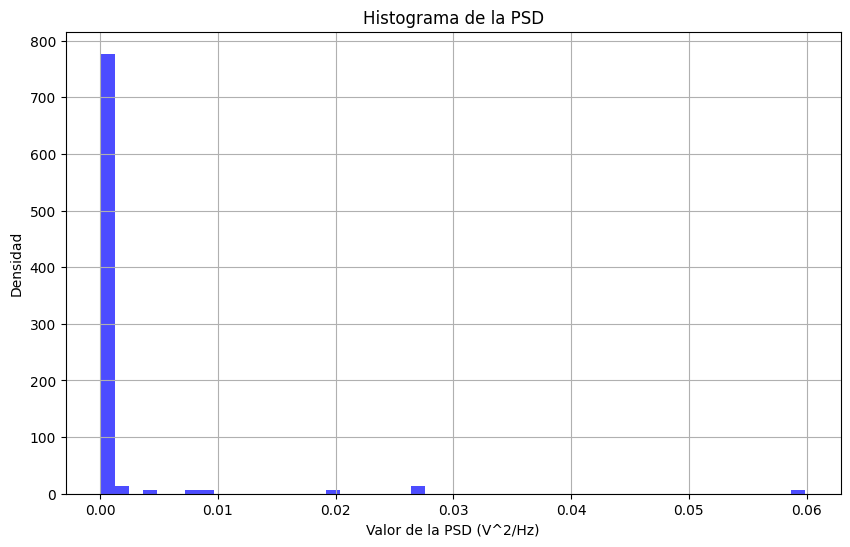

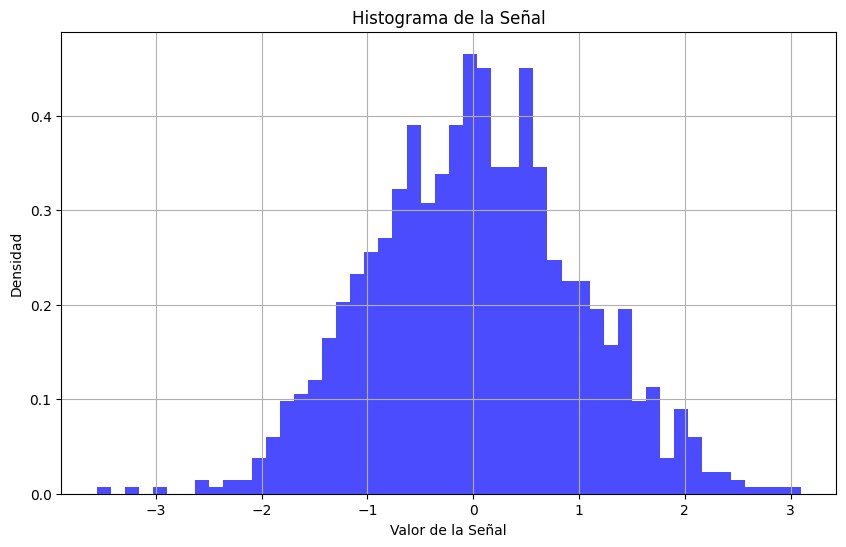

In [ ]:
import numpy as np
from scipy.signal import welch
import matplotlib.pyplot as plt

# Asumiendo que 'X_test[0]' es la señal que estamos analizando y 'fs' es la frecuencia de muestreo

# Calcular la PSD de la señal
f, Pxx = welch(X_test[0], fs, nperseg=256)

# Calcular el histograma de los valores de la PSD
hist, bin_edges = np.histogram(Pxx, bins=50, density=True)

# Graficar el histograma
plt.figure(figsize=(10, 6))
plt.hist(Pxx, bins=50, density=True, alpha=0.7, color='blue')
plt.title('Histograma de la PSD')
plt.xlabel('Valor de la PSD (V^2/Hz)')
plt.ylabel('Densidad')
plt.grid(True)
plt.show()

# Supongamos que 'signal' es la señal cuya distribución queremos analizar
# Para este ejemplo, voy a generar una señal de muestra
signal = np.random.randn(1000)  # Señal de ejemplo: 1000 valores aleatorios de una distribución normal

# Calcular el histograma
hist, bin_edges = np.histogram(signal, bins=50, density=True)

# Graficar el histograma
plt.figure(figsize=(10, 6))
plt.hist(signal, bins=50, density=True, alpha=0.7, color='blue')
plt.title('Histograma de la Señal')
plt.xlabel('Valor de la Señal')
plt.ylabel('Densidad')
plt.grid(True)
plt.show()

